<a href="https://colab.research.google.com/github/ZUHAIR-5421342/DS482-DeepLearning-Project/blob/main/MINIST_model_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the MNIST Dataset

**MNIST** (Modified National Institute of Standards and Technology) is one of the most popular datasets for training and testing image classification models. It is widely used for benchmarking machine learning algorithms.

## Key Facts

- **Images:**  
  - Grayscale images with a size of 28x28 pixels.

- **Number of Samples:**  
  - 70,000 images in total.
  - **Training Set:** 60,000 images.
  - **Test Set:** 10,000 images.

- **Classes:**  
  - The digits 0 through 9 (10 classes).

## Why Use MNIST?

- **Simplicity:**  
  The dataset is straightforward and perfect for learning the basics of image processing and classification.
  
- **Benchmarking:**  
  It provides a standard benchmark for comparing different machine learning models and algorithms.

- **Educational Value:**  
  MNIST is widely used in academic courses, tutorials, and research due to its manageable size and ease of use.

## Further Reading and References

- Visit [Yann LeCun's MNIST page](http://yann.lecun.com/exdb/mnist/) for the original dataset source.
- Read the classic [LeCun et al. (1998) paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) on MNIST.
- Learn more on [Wikipedia's MNIST page](https://en.wikipedia.org/wiki/MNIST_dataset).

This documentation helps establish context for the data used in CNN models for classification, and can serve as a useful reference for others reviewing your notebook.

## CNN for MNIST Digit Classification

### This notebook demonstrates how to train a Convolutional Neural Network (CNN)
### on the MNIST dataset to classify handwritten digits. We cover:

### - Loading and preprocessing the MNIST data
### - Building a CNN model using TensorFlow/Keras
### - Training the model with validation splits
### - Evaluating the model on test data with metrics and a classification report
### - Visualizing training curves, the confusion matrix, and some sample predictions


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1. Load and Preprocess the MNIST Data

### The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9).
### We normalize the image pixel values to the range [0, 1] and add a channel dimension.

In [ ]:
# Load MNIST data from TensorFlow/Keras datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# MNIST images are 28x28; add a channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# 2. Build the CNN Model

### We design a simple CNN with two convolutional layers, followed by max pooling,
### a flattening layer, a dense hidden layer, dropout for regularization and a final output layer with a softmax activation.

In [ ]:
model = Sequential([
    # First convolutional block
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully-connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# 3. Compile and Train the Model

### We compile the model using the Adam optimizer and the Sparse Categorical Crossentropy loss
### (since our labels are integers). We will also monitor accuracy during training.
### We use a validation split of 10% to observe the model's performance on unseen data during training.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.1, verbose=1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 84ms/step - accuracy: 0.7882 - loss: 0.6792 - val_accuracy: 0.9827 - val_loss: 0.0591
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.9646 - loss: 0.1147 - val_accuracy: 0.9865 - val_loss: 0.0483
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9764 - loss: 0.0763 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9807 - loss: 0.0623 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9845 - loss: 0.0507 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9861 - loss: 0.0460 - val_accuracy: 0.9893 - val_loss: 0.0364
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9866 - loss: 0.0409 - val_accuracy: 0.9908 - val_loss: 0.0310
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9899 - loss: 0.0330 - 

#4. Evaluate the Model on Test Data

### We evaluate the model's performance on the test set and generate metrics, including
### accuracy, a classification report, and a confusion matrix.


In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict class probabilities on the test set
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate a classification report
report = classification_report(y_test, pred_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred_labels)


Test Loss: 0.0264
Test Accuracy: 0.9911
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# 5. Visualization

### In this section, we plot:
### - The training and validation loss and accuracy curves over epochs.
### - The confusion matrix using a heatmap.
### - Some example predictions from the test set.

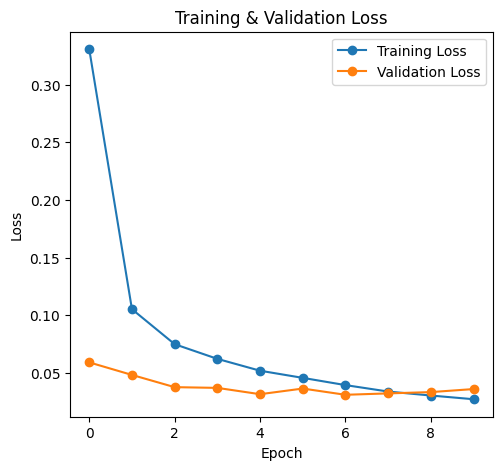

In [ ]:
# Plot training & validation loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

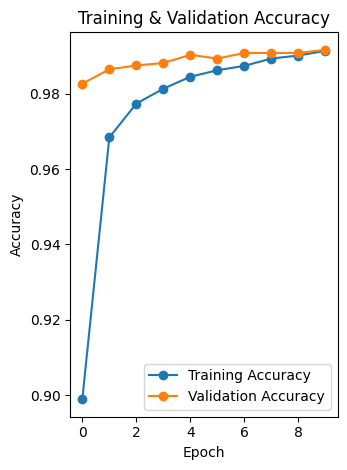

In [ ]:
# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

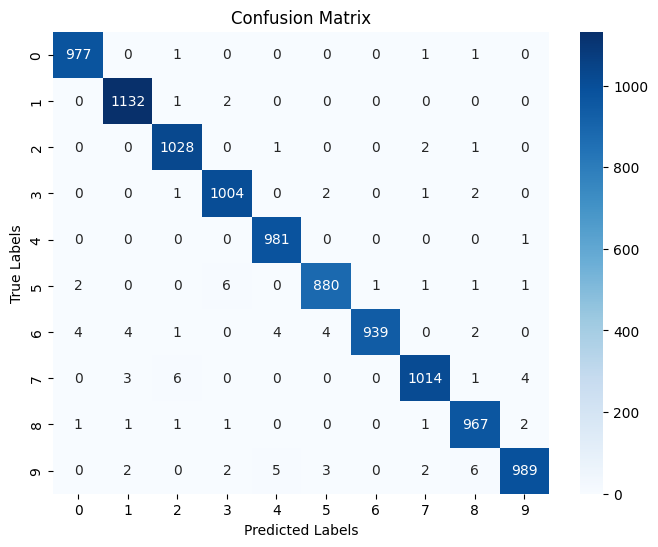

In [ ]:
# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

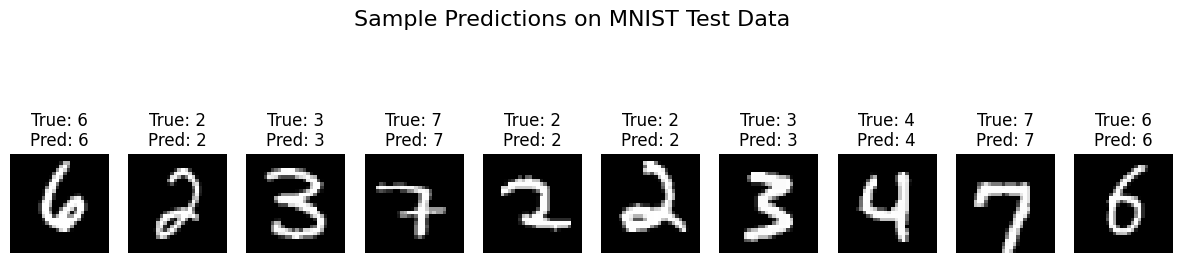

In [ ]:
# Visualize some sample predictions
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    img = x_test[idx].squeeze()  # Remove channel dimension for display
    true_label = y_test[idx]
    pred_label = pred_labels[idx]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.suptitle("Sample Predictions on MNIST Test Data", fontsize=16)
plt.show()


# Model Evaluation Interpretation

## Test Loss: 0.0264
**What It Means:**  
The loss value is a measure of how well the model’s predicted probability distribution matches the true distribution of labels. A value of 0.0264 is very low, indicating that the model's predictions are very close to the ground truth labels.

**Implication:**  
A low loss means the model is confident in its predictions, and the error (or discrepancy between predicted and actual labels) is minimal on the test set.

---

## Test Accuracy: 0.9911
**What It Means:**  
Test accuracy is the percentage of test examples the model correctly classified. An accuracy of 0.9911, or 99.11%, means that nearly all test images were correctly identified.

**Implication:**  
With such high accuracy, the model demonstrates strong generalization on unseen MNIST data.

---

## Classification Report

The detailed classification report provides per-class performance metrics such as precision, recall, and F1-score for each digit. Here’s how to interpret them:

- **Precision:**  
  Represents the proportion of positive identifications that were actually correct.  
  *Example:* For digit "0", a precision of 0.99 means that when the model predicted "0", 99% of those predictions were correct.
  
- **Recall:**  
  Measures the proportion of actual positives that were correctly identified.  
  *Example:* A recall of 1.00 for digit "0" shows that the model correctly identified all instances of "0" in the test set.
  
- **F1-Score:**  
  The harmonic mean of precision and recall. An F1-score close to 0.99 for nearly all classes confirms that both precision and recall are well balanced.
  
- **Support:**  
  Indicates the number of actual instances for each digit present in the test set.  
  These numbers help assess whether a class’s metrics are reliable or might be skewed by a small sample size.
  
- **Overall Averages:**  
  - **Macro Average:** The simple average of the precision, recall, and F1-scores across all classes (treating each class equally). Values around 0.99 show consistent performance for all classes.  
  - **Weighted Average:** Similar to the macro average but takes into account the number of instances per class. A weighted average of approximately 0.99 indicates uniformly high performance across classes.

---

## Overall Interpretation

- **Model Effectiveness:**  
  The CNN model for MNIST demonstrates excellent performance, as evidenced by the very low loss (0.0264) and high accuracy (99.11%).
  
- **Per-Class Performance:**  
  Nearly every digit is classified with very high precision and recall, indicating that the model isn’t favoring any particular class over another.
  
- **Generalization:**  
  Since the model performs exceptionally well on the test set, it can be inferred that it has generalized well from the training data with minimal overfitting.

*In summary, these metrics indicate that the CNN is highly reliable for MNIST digit classification and that the model’s predictions are both accurate and robust across all classes.*

---

# About the MNIST Dataset

**MNIST** (Modified National Institute of Standards and Technology) is a widely used dataset of handwritten digits that serves as a benchmark for evaluating classification algorithms in machine learning.

## Content of the Dataset

- **Images:**  
  Grayscale images with a size of 28x28 pixels.

- **Number of Samples:**  
  - A total of 70,000 images
    - **Training Set:** 60,000 images
    - **Test Set:** 10,000 images

- **Classes:**  
  The images are labeled into 10 classes, corresponding to the digits 0 through 9.

## Why is MNIST Popular?

- **Simplicity:**  
  The balanced nature and relatively low dimensionality of the images make MNIST an excellent choice for beginners.
  
- **Benchmarking:**  
  It provides a standard benchmark for comparing the performance of different machine learning models, such as CNNs, SVMs, etc.
  
- **Usage:**  
  Extensively used for educational purposes and for algorithm benchmarking in the research community.

## References and Further Reading

- **Yann LeCun's MNIST Page:**  
  [View MNIST Dataset](http://yann.lecun.com/exdb/mnist/)
  
- **LeCun et al. (1998) Paper:**  
  [Read the Original Paper (PDF)](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
  
- **Wikipedia:**  
  [Learn More on Wikipedia](https://en.wikipedia.org/wiki/MNIST_dataset)